# Logistic regression with scikit-learn 📊

Let's come back to our famous toy-dataset and change the objective : we would like to predict if a person will buy a product (variable "Purchased") as a function of the other variables. To do so, we'll train a logistic regression model and evaluate its performances.

## What will you learn in this course? 🧐🧐
This lecture is a follow-along demo that will guide you through the steps of building logistic regressions models and evaluate them on actual data.

* Multivariate logistic regression
    * Training Pipeline
    * Test Pipeline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("src/Data.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Number of rows : 10

Display of dataset: 


,Country,Age,Salary,Purchased
0,France,44.0,72000,No
1,Spain,27.0,48000,Yes
2,Germany,30.0,54000,No
3,Spain,38.0,61000,No
4,Germany,40.0,69000,Yes



Basics statistics: 


,Country,Age,Salary,Purchased
count,10,9.000000,10.000000,10
unique,3,NaN,NaN,2
top,France,NaN,NaN,No
freq,4,NaN,NaN,5
mean,NaN,38.777778,64300.000000,NaN
std,NaN,7.693793,11681.419244,NaN
min,NaN,27.000000,48000.000000,NaN
25%,NaN,35.000000,55000.000000,NaN
50%,NaN,38.000000,64000.000000,NaN
75%,NaN,44.000000,71250.000000,NaN



Percentage of missing values: 


Country       0.0
Age          10.0
Salary        0.0
Purchased     0.0
dtype: float64

## EDA
The EDA that has been done in the previous lectures is still valid. As we're now willing to predict the value of _Purchased_ as a function of the other variables, it would also be interesting to display the distribution of the explanatory variables obtained for the different values of _Purchased_:

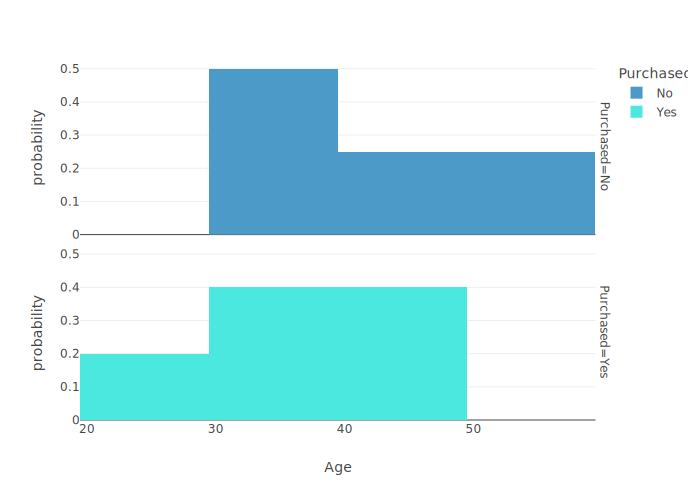

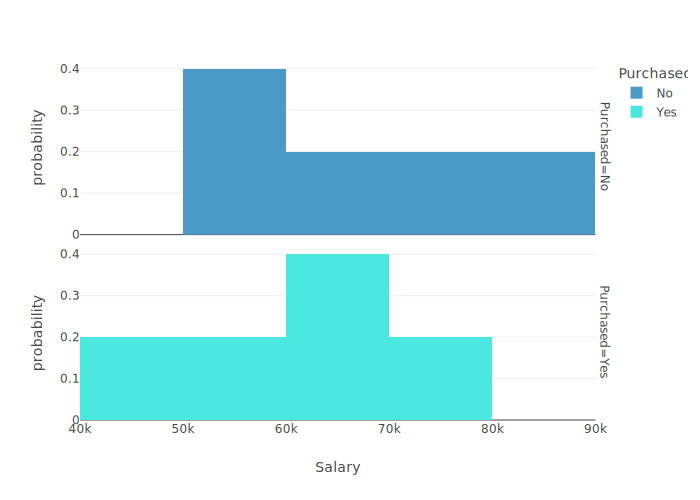

In [30]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ['Age', 'Salary']
for f in num_features:
    fig = px.histogram(dataset, f, color = 'Purchased', facet_row = 'Purchased', histnorm = 'probability')
    fig.show()

:::tip Good to know
As the target variable (_Purchased_) is categorical, it's not possible to make a scatterplot or to compute a correlation coefficient to test the dependency between the features and the target. The figure above allows to get an hint about which feature carries useful information to predict Y: if the distribution is very different depending on the value of Y, then the variable might be a good predictor of the target!
:::

## Baseline model : simple logistic regression
Let's try a first basic model : simple logistic regression with only one feature (_Salary_).

In [5]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Salary"]
target_variable = "Purchased"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

X :
   Salary
0   72000
1   48000
2   54000
3   61000
4   69000


In [6]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### Preprocessing
:::note Simplified syntax
In this first example, we don't need to use the classes `Pipeline` and `ColumnTransformer` because the preprocessing on the features X is very simple : it just consists in standardizing the variable _Salary_ (there are no missing values in this column). In this case, we can just create an instance of `StandardScaler` and call the `fit_transform` and `transform` methods directly on it, by passing X_train/X_test as argument.

We'll also make a label encoding on the target Y_train/Y_test, because it's categorical this time 🤓
:::

In [7]:
print("Preprocessing X_train...")
print(X_train.head())
print()
preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print() 

# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

Preprocessing X_train...
   Salary
4   69000
9   67000
1   48000
6   52000
7   79000

...Done!
[[ 0.58858382]
 [ 0.38385901]
 [-1.56102665]
 [-1.15157703]
 [ 1.61220785]]

Encoding labels...
4    Yes
9    Yes
1    Yes
6     No
7    Yes
Name: Purchased, dtype: object
...Done
[1 1 1 0 1]


In [8]:
# Test pipeline
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print() 

# Label encoding
print("Encoding labels...")
print(Y_test.head())
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Preprocessing X_test...
   Salary
2   54000
8   83000

...Done!
[[-0.94685223]
 [ 2.02165746]]

Encoding labels...
2    No
8    No
Name: Purchased, dtype: object
...Done
[0 0]


### Train model

In [9]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


### Performance assessment

In [10]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[1 1 1 1 1 1 1 1]

Probabilities on training set...
...Done.
[[0.35110617 0.64889383]
 [0.35905381 0.64094619]
 [0.43788384 0.56211616]
 [0.42087822 0.57912178]
 [0.3126592  0.6873408 ]
 [0.38335037 0.61664963]
 [0.339339   0.660661  ]
 [0.39572955 0.60427045]]



In [11]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[1 1]

Probabilities on test set...
...Done.
[[0.41244271 0.58755729]
 [0.29793914 0.70206086]]



In [12]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.625
accuracy on test set :  0.0

f1-score on training set :  0.7692307692307693
f1-score on test set :  0.0



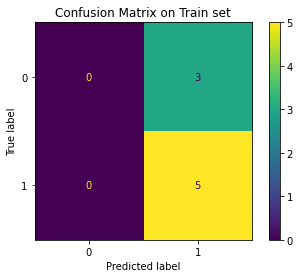

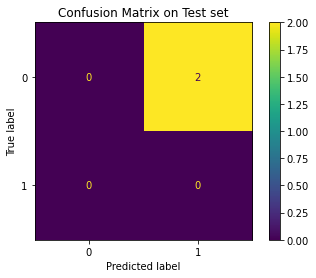

In [13]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

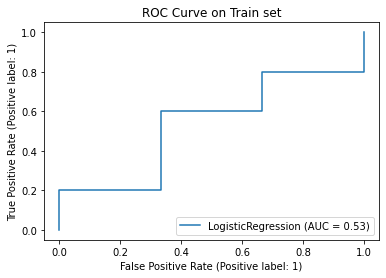

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



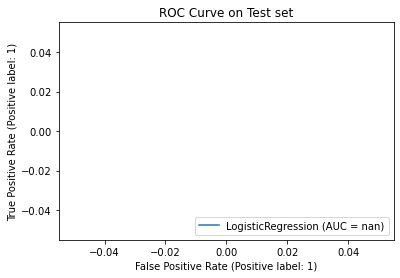

In [14]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

:::note Empty plot
The plot above is empty because the ROC curve implies that we have examples belonging to the two classes (0 and 1). However, the test set is very small (there are only two examples) and it contains only 0s. This shouldn't occur while working on datasets with a sufficient number of examples 😌
:::

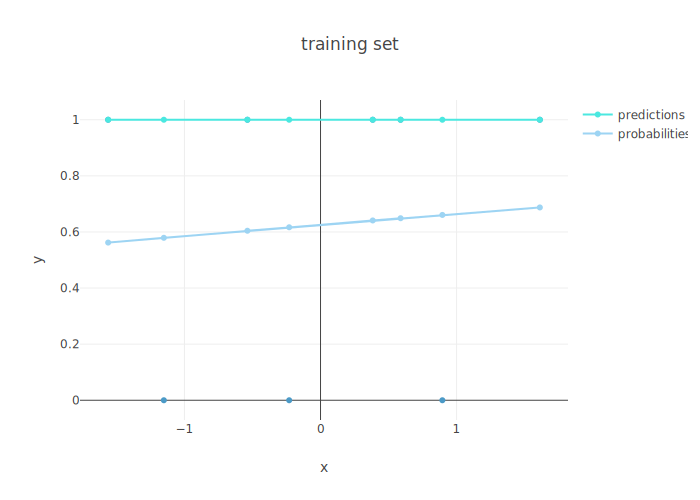

In [15]:
# Visualize the model
# Visualize predictions on training Set
fig = px.scatter(x = X_train.flatten().tolist(), y = Y_train, title = "training set")
fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = Y_train_pred, name = "predictions"))
fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = Y_train_proba[:,1], name = "probabilities"))
fig.show()

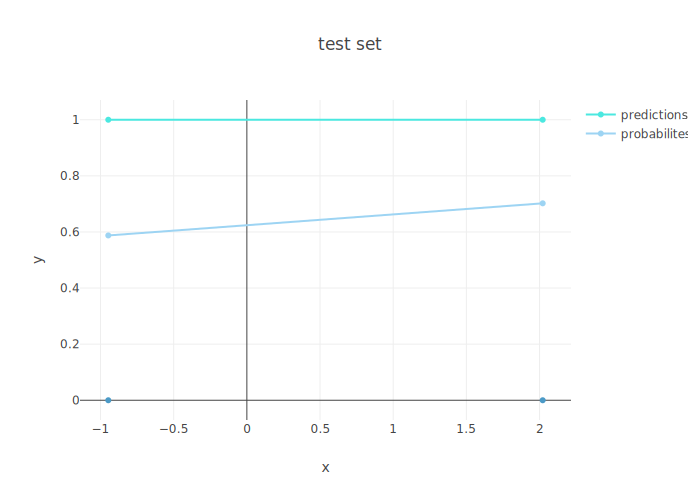

In [16]:
# Visualize predictions on test Set
fig = px.scatter(x = X_test.flatten().tolist(), y = Y_test, title = "test set")
fig.add_trace(go.Scatter(x = X_test.flatten().tolist(), y = Y_test_pred, name = "predictions"))
fig.add_trace(go.Scatter(x = X_test.flatten().tolist(), y = Y_test_proba[:,1], name = "probabilites"))
fig.show()

## Multivariate logistic regression
Let's train a multivariate model with 3 variables: `Age`, `Country` and `Salary`.

In [17]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Purchased"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

X :
   Country   Age  Salary
0   France  44.0   72000
1    Spain  27.0   48000
2  Germany  30.0   54000
3    Spain  38.0   61000
4  Germany  40.0   69000


In [18]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Age', 'Salary']
Found categorical features  ['Country']


In [19]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### Preprocessing

In [20]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [21]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first') # no missing values in categorical data, so we only need the OHE

In [22]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
   Country   Age  Salary
0   France  44.0   72000
4  Germany  40.0   69000
6    Spain   NaN   52000
9   France  37.0   67000
3    Spain  38.0   61000
...Done.
[[ 1.61706195e+00  1.46885753e+00  0.00000000e+00  0.00000000e+00]
 [ 8.22715727e-01  1.09777773e+00  1.00000000e+00  0.00000000e+00]
 [-1.41104234e-15 -1.00500778e+00  0.00000000e+00  1.00000000e+00]
 [ 2.26956063e-01  8.50391200e-01  0.00000000e+00  0.00000000e+00]
 [ 4.25542617e-01  1.08231607e-01  0.00000000e+00  1.00000000e+00]]

Encoding labels...
0     No
4    Yes
6     No
9    Yes
3     No
Name: Purchased, dtype: object
...Done
[0 1 0 1 0]
Performing preprocessings on test set...
   Country   Age  Salary
8  Germany  50.0   83000
7   France  48.0   79000
...Done.
[[2.80858127 2.82948345 1.         0.        ]
 [2.41140816 2.33471038 0.         0.        ]]

Encoding labels...
8     No
7    Yes
Name: Purchased, dtype: object
...Done
[0 1]


### Train model

In [24]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


### Performance assessment

In [25]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 1 0 1 1 1]

Probabilities on training set...
...Done.
[[0.55874347 0.44125653]
 [0.50914109 0.49085891]
 [0.62078895 0.37921105]
 [0.42785775 0.57214225]
 [0.5939559  0.4060441 ]
 [0.43566756 0.56433244]
 [0.39464843 0.60535157]
 [0.4592025  0.5407975 ]]



In [26]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0]

Probabilities on test set...
...Done.
[[0.63125494 0.36874506]
 [0.59511793 0.40488207]]



In [27]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.75
accuracy on test set :  0.5

f1-score on training set :  0.75
f1-score on test set :  0.0



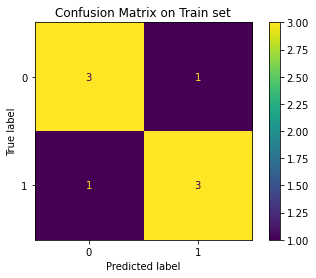

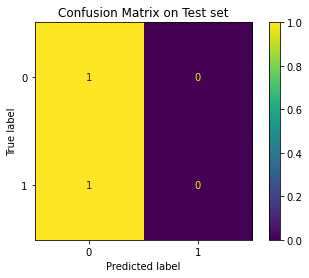

In [28]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

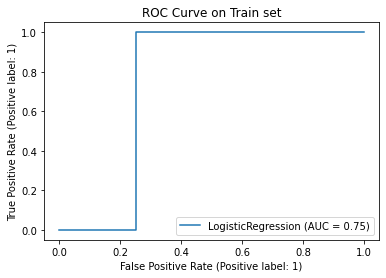

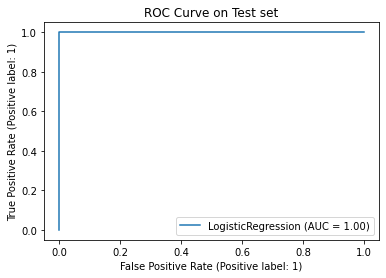

In [29]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

## Resources 📚📚

* Update sklearn to version 1.0 - [https://bit.ly/2Csascr](https://scikit-learn.org/stable/install.html)
* Metrics and scoring: quantifying the quality of predictions - [https://bit.ly/0CSasrz](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)
* ConfusionMatrixDisplay - [https://bit.ly/20SCsss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)
* RocCurveDisplay - [https://bit.ly/ZCsassZ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions)